In [3]:
import numpy as np

# **Создание массива:**
Создать массив можно несколькими способами:

1.преобразовать список в массив:

In [6]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

2.скопировать массив

In [7]:
B = A.copy()
B

array([[1, 2, 3],
       [4, 5, 6]])

# Cоздать нулевой или единичный массив заданного размера можно следующим образом:

In [12]:
A = np.zeros((2, 3))
A

array([[0., 0., 0.],
       [0., 0., 0.]])

In [11]:
B = np.ones((3, 2))
B

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

# Либо взять размеры уже существующего массива:


In [13]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.zeros_like(A)
B

array([[0, 0, 0],
       [0, 0, 0]])

# построить массив чисел от From (включая) до To (не включая) с шагом Step:


In [15]:
From = 2.5
To = 7
Step = 0.5
A = np.arange(From, To, Step)
A

array([2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5])

# По умолчанию from = 0, step = 1, поэтому возможен вариант с одним параметром, интерпретируемым как To:

In [16]:
A = np.arange(5)
A

array([0, 1, 2, 3, 4])

# Обратите внимание, что в методе выше размеры массива передавались в качестве одного параметра (кортеж размеров). Вторым параметром можно указать желаемый тип элементов массива:

In [17]:
A = np.zeros((2, 3), 'int')
A


array([[0, 0, 0],
       [0, 0, 0]])

In [18]:
B = np.ones((3, 2), 'complex')
B


array([[1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j]])

# Используя метод astype, можно привести массив к другому типу. В качестве параметра указывается желаемый тип:

In [19]:
A = np.ones((3, 2))
B = A.astype('str')
B

array([['1.0', '1.0'],
       ['1.0', '1.0'],
       ['1.0', '1.0']], dtype='<U32')

# Доступ к элементам массива осуществляется по целочисленным индексами, начинается отсчет с 0:

In [20]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A[1, 1]

5

Если представить многомерный массив как систему вложенных одномерных массивов (линейный массив, элементы которого могут быть линейными массивами), становится очевидной возможность получать доступ к подмассивам с использованием неполного набора индексов:

In [21]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A[1]

array([4, 5, 6])

С учетом этой парадигмы, можем переписать пример доступа к одному элементу:

In [22]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A[1][1]


5

При использовании неполного набора индексов, недостающие индексы неявно заменяются списком всех возможных индексов вдоль соответствующей оси. Сделать это явным образом можно, поставив ":". Предыдущий пример с одним индексом можно переписать в следующем виде:


In [23]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A[1, :]


array([4, 5, 6])

«Пропустить» индекс можно вдоль любой оси или осей, если за «пропущенной» осью последуют оси с индексацией, то ":" обязательно:

In [24]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A[:, 1]

array([2, 5])

# В NumPy также реализована возможность доступа ко множеству элементов массива через булев индексный массив. Индексный массив должен совпадать по форме с индексируемым.


In [25]:
A = np.array([[1, 2, 3], [4, 5, 6]])
I = np.array([[False, False, True], [ True, False, True]])
A[I]

array([3, 4, 6])

Как видите, такая конструкция возвращает плоский массив, состоящий из элементов индексируемого массива, соответствующих истинным индексам. Однако, если мы используем такой доступ к элементам массива для изменения их значений, то форма массива сохранится:

In [26]:
A = np.array([[1, 2, 3], [4, 5, 6]])
I = np.array([[False, False, True], [True, False, True]])
A[I] = 0
print(A)

[[1 2 0]
 [0 5 0]]


# Форма массива и ее изменение

## Многомерный массив можно представить как одномерный массив максимальной длины, нарезанный на фрагменты по длине самой последней оси и уложенный слоями по осям, начиная с последних.
### Для наглядности рассмотрим пример:


In [27]:
A = np.arange(24)
B = A.reshape(4, 6)
C = A.reshape(4, 3, 2)
print('B\n', B)
print('\nC\n', C)

B
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]

C
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]


### В этом примере мы из одномерного массива длиной 24 элемента сформировали 2 новых массива. Массив B, размером 4 на 6. Если посмотреть на порядок значений, то видно, что вдоль второго измерения идут цепочки последовательных значений.

### В массиве C, размером 4 на 3 на 2, непрерывные значения идут вдоль последней оси. Вдоль второй оси идут последовательно блоки, объединение которых дало бы в результате строки вдоль второй оси массива B.

### А учитывая, что мы не делали копии, становится понятно, что это разные формы преставления одного и того же массива данных. Поэтому можно легко и быстро менять форму массива, не изменяя самих данных.

### Чтобы узнать размерность массива (количество осей), можно использовать поле ndim (число), а чтобы узнать размер вдоль каждой оси — shape (кортеж). Размерность можно также узнать и по длине shape. Чтобы узнать полное количество элементов в массиве можно воспользоваться значением size:

In [28]:
A = np.arange(24)
C = A.reshape(4, 3, 2)

print(C.ndim, C.shape, len(C.shape), A.size)

3 (4, 3, 2) 3 24


## Обратите внимание, что ndim и shape — это атрибуты, а не методы!

Чтобы увидеть массив одномерным, можно воспользоваться функцией ravel:

In [29]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.ravel()


array([1, 2, 3, 4, 5, 6])

## Чтобы поменять размеры вдоль осей или размерность используется метод reshape:

In [30]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.reshape(3, 2)


array([[1, 2],
       [3, 4],
       [5, 6]])

## Важно, чтобы количество элементов сохранилось. Иначе возникнет ошибка:

In [31]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.reshape(3, 3)

ValueError: cannot reshape array of size 6 into shape (3,3)

## Учитывая, что количество элементов постоянно, размер вдоль одной любой оси при выполнении reshape может быть вычислен из значений длины вдоль других осей. Размер вдоль одной оси можно обозначить -1 и тогда он будет вычислен автоматически:

In [33]:
A = np.arange(24)
B = A.reshape(4, -1)
C = A.reshape(4, -1, 2)

print(B.shape, C.shape)

(4, 6) (4, 3, 2)


## Рассмотрим практическое применение некоторых возможностей для обработки изображений. В качестве объекта исследования будем использовать фотографию.

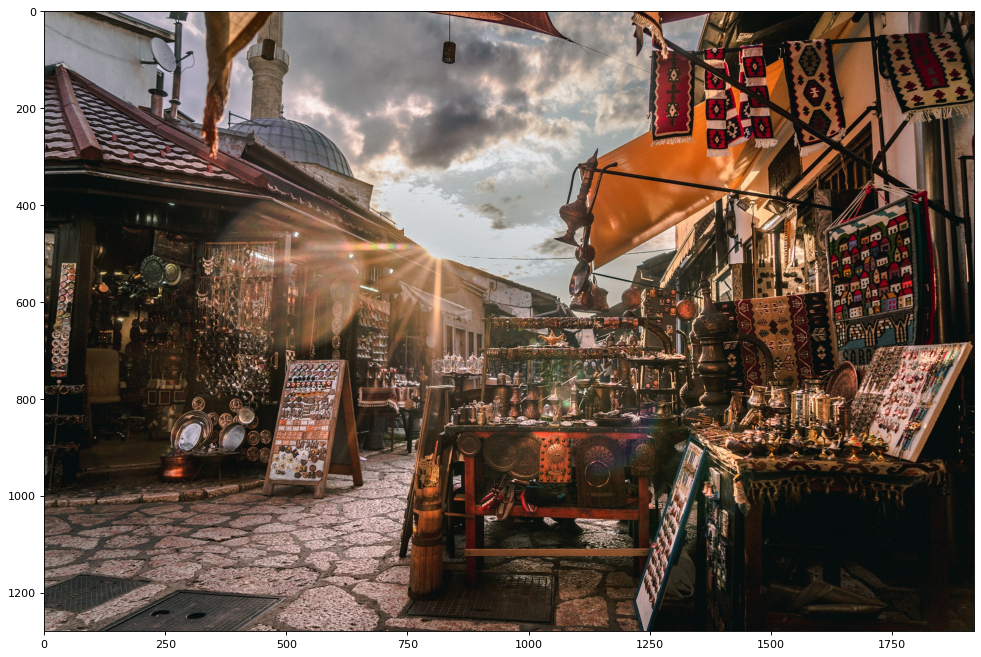

In [35]:
import cv2
from matplotlib import pyplot as plt

I = cv2.imread('/content/sarajevo.jpeg')[:, :, ::-1]
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(I)
plt.show()

## Обратите внимание на строку загрузки:

In [37]:
I = cv2.imread('/content/sarajevo.jpeg')[:, :, ::-1]
print(I.shape)

(1280, 1920, 3)


## OpenCV работает с изображениями в формате BGR, а нам привычен RGB. Мы меняем порядок байтов вдоль оси цвета без обращения к функциям OpenCV, используя конструкцию "[:, :, ::-1]".

Уменьшим изображение в 2 раза по каждой оси. Наше изображение имеет четные размеры по осям, соответственно, может быть уменьшено без интерполяции:


(640, 2, 960, 2, 3)


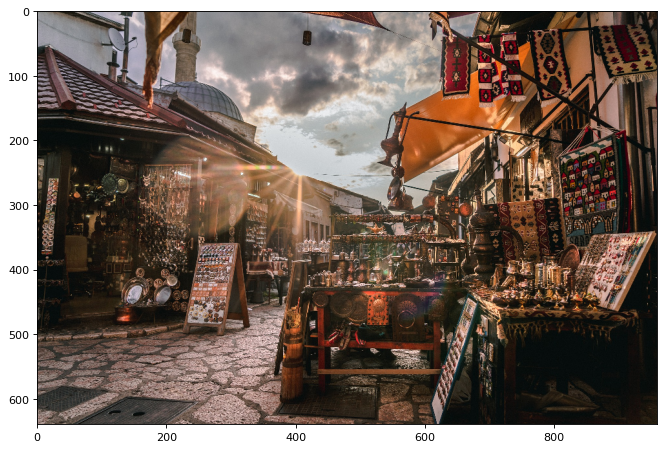

In [38]:
I_ = I.reshape(I.shape[0] // 2, 2, I.shape[1] // 2, 2, -1)
print(I_.shape)

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(I_[:, 0, :, 0])
plt.show()

## Поменяв форму массива, мы получили 2 новые оси, по 2 значения в каждой, им соответствуют кадры, составленные из нечетных и четных строк и столбцов исходного изображения.


# Перестановка осей и траспонирование
## кроме изменения формы массива при неизменном порядке единиц данных, часто встречается необходимость изменить порядок следования осей, что естественным образом повлечет перестановки блоков данных. Примером такого преобразования может быть транспонирование матрицы: взаимозамена строк и столбцов.

In [39]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print('A\n', A)
print('\nA data\n', A.ravel())

B = A.T
print('\nB\n', B)
print('\nB data\n', B.ravel())


A
 [[1 2 3]
 [4 5 6]]

A data
 [1 2 3 4 5 6]

B
 [[1 4]
 [2 5]
 [3 6]]

B data
 [1 4 2 5 3 6]


## В этом примере для транспонирования матрицы A использовалась конструкция A.T. Оператор транспонирования инвертирует порядок осей. Рассмотрим еще один пример с тремя осями:

In [40]:
C = np.arange(24).reshape(4, -1, 2)

print(C.shape, np.transpose(C).shape)
print()
print(C[0])
print()
print(C.T[:, :, 0])


(4, 3, 2) (2, 3, 4)

[[0 1]
 [2 3]
 [4 5]]

[[0 2 4]
 [1 3 5]]


## У этой короткой записи есть более длинный аналог: np.transpose(A). Это более универсальный инструмент для замены порядка осей. Вторым параметром можно задать кортеж номеров осей исходного массива, определяющий порядок их положения в результирующем массиве.
## Для примера переставим первые две оси изображения. Картинка должна перевернуться, но цветовую ось оставим без изменения:


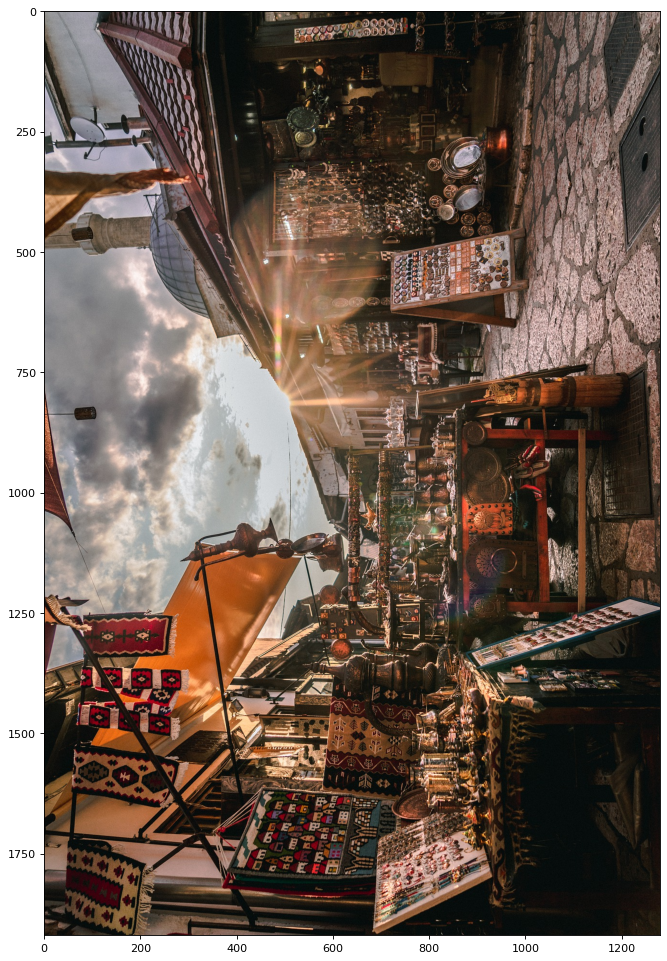

In [41]:
I_ = np.transpose(I, (1, 0, 2))

plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(I_)
plt.show()

## Для этого примера можно было применить другой инструмент swapaxes. Этот метод переставляет местами две оси, указанные в параметрах. Пример выше можно было реализовать так:

In [42]:
I_ = np.swapaxes(I, 0, 1)

# Объединение массивов
## Объединяемые массивы должны иметь одинаковое количество осей. Объединять массивы можно с образованием новой оси, либо вдоль уже существующей. Для объединения с образованием новой оси исходные массивы должны иметь одинаковые размеры вдоль всех осей:


In [45]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
B = A[::-1]
C = A[:, ::-1]

D = np.stack((A, B, C))
print(D.shape)
D


(3, 2, 4)


array([[[1, 2, 3, 4],
        [5, 6, 7, 8]],

       [[5, 6, 7, 8],
        [1, 2, 3, 4]],

       [[4, 3, 2, 1],
        [8, 7, 6, 5]]])

## Как видно из примера, массивы-операнды стали подмассивами нового объекта и выстроились вдоль новой оси, которая стоит самой первой по порядку.

## Для объединения массивов вдоль существующей оси, они должны иметь одинаковый размер по всем осям, кроме выбранной для объединения, а по ней могут иметь произвольные размеры:

In [46]:
A = np.ones((2, 1, 2))
B = np.zeros((2, 3, 2))

C = np.concatenate((A, B), 1)
print(C.shape)
C


(2, 4, 2)


array([[[1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

## Для объединения по первой или второй оси можно использовать методы vstack и hstack соответсвенно. Покажем это на примере изображений. vstack объединяет изображения одинаковой ширины по высоте, а hsstack объединяет одинаковые по высоте картинки в одно широкое:

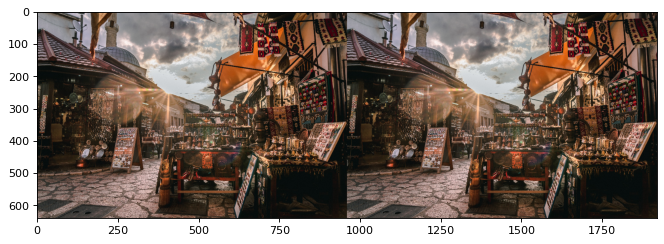

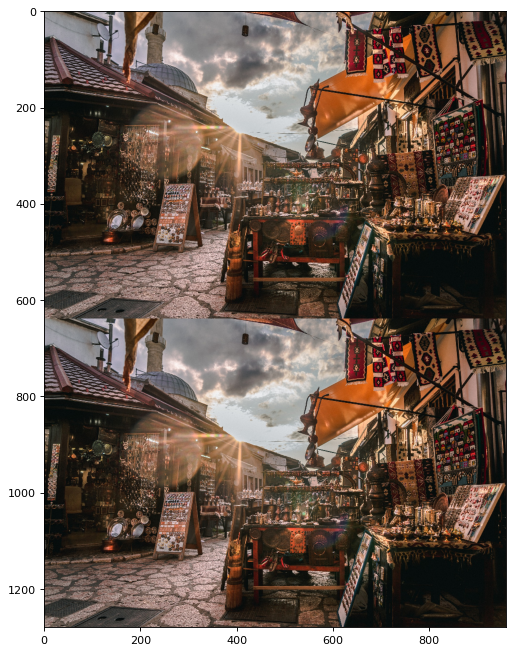

In [48]:
I = cv2.imread('/content/sarajevo.jpeg')[:, :, ::-1]

I_ = I.reshape(I.shape[0] // 2, 2, I.shape[1] // 2, 2, -1)

Ih = np.hstack((I_[:, 0, :, 0], I_[:, 0, :, 1]))
Iv = np.vstack((I_[:, 0, :, 0], I_[:, 1, :, 0]))

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(Ih)
plt.show()

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(Iv)
plt.show()

## Обратите внимание на то, что во всех примерах этого раздела объединяемые массивы передаются одним параметром (кортежем). Количество операндов может быть любым, а не обязательно только 2.

## Также обратите внимание на то, что происходит с памятью, при объединении массивов:

In [47]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
B = A[::-1]
C = A[:, ::-1]

D = np.stack((A, B, C))
D[0, 0, 0] = 0
print(A)

[[1 2 3 4]
 [5 6 7 8]]


## Так как создается новый объект, данные в него копируются из исходных массивов, поэтому изменения в новых данных не влияют на исходные.

# Математические операции над элементами массива
## Если A и B массивы одинакового размера, то их можно складывать, умножать, вычитать, делить и возводить в степень. Эти операции выполняются поэлементно, результирующий массив будет совпадать по геометрии с исходными массивами, а каждый его элемент будет результатом выполнения соответствующей операции над парой элементов из исходных массивов:


In [49]:
A = np.array([[-1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
B = np.array([[1., -2., -3.], [7., 8., 9.], [4., 5., 6.], ])

C = A + B
D = A - B
E = A * B
F = A / B
G = A ** B

print('+\n', C, '\n')
print('-\n', D, '\n')
print('*\n', E, '\n')
print('/\n', F, '\n')
print('**\n', G, '\n')


+
 [[ 0.  0.  0.]
 [11. 13. 15.]
 [11. 13. 15.]] 

-
 [[-2.  4.  6.]
 [-3. -3. -3.]
 [ 3.  3.  3.]] 

*
 [[-1. -4. -9.]
 [28. 40. 54.]
 [28. 40. 54.]] 

/
 [[-1.         -1.         -1.        ]
 [ 0.57142857  0.625       0.66666667]
 [ 1.75        1.6         1.5       ]] 

**
 [[-1.0000000e+00  2.5000000e-01  3.7037037e-02]
 [ 1.6384000e+04  3.9062500e+05  1.0077696e+07]
 [ 2.4010000e+03  3.2768000e+04  5.3144100e+05]] 



## Можно выполнить любую операцию из приведенных выше над массивом и числом. В этом случае операция также выполнится над каждым из элементов массива:

In [50]:
A = np.array([[-1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
B = -2.

C = A + B
D = A - B
E = A * B
F = A / B
G = A ** B

print('+\n', C, '\n')
print('-\n', D, '\n')
print('*\n', E, '\n')
print('/\n', F, '\n')
print('**\n', G, '\n')

+
 [[-3.  0.  1.]
 [ 2.  3.  4.]
 [ 5.  6.  7.]] 

-
 [[ 1.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]] 

*
 [[  2.  -4.  -6.]
 [ -8. -10. -12.]
 [-14. -16. -18.]] 

/
 [[ 0.5 -1.  -1.5]
 [-2.  -2.5 -3. ]
 [-3.5 -4.  -4.5]] 

**
 [[1.         0.25       0.11111111]
 [0.0625     0.04       0.02777778]
 [0.02040816 0.015625   0.01234568]] 



## Учитывая, что многомерный массив можно рассматривать как плоский массив (первая ось), элементы которого — массивы (остальные оси), возможно выполнение рассматриваемых операций над массивами A и B в случае, когда геометрия B совпадает с геометрией подмассивов A при фиксированном значении по первой оси. Иными словами, при совпадающем количестве осей и размерах A[i] и B. Этом случае каждый из массивов A[i] и B будут операндами для операций, определенных над массивами.

In [51]:
A = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
B = np.array([-1.1, -1.2, -1.3])

C = A.T + B
D = A.T - B
E = A.T * B
F = A.T / B
G = A.T ** B

print('+\n', C, '\n')
print('-\n', D, '\n')
print('*\n', E, '\n')
print('/\n', F, '\n')
print('**\n', G, '\n')


+
 [[-0.1  2.8  5.7]
 [ 0.9  3.8  6.7]
 [ 1.9  4.8  7.7]] 

-
 [[ 2.1  5.2  8.3]
 [ 3.1  6.2  9.3]
 [ 4.1  7.2 10.3]] 

*
 [[ -1.1  -4.8  -9.1]
 [ -2.2  -6.  -10.4]
 [ -3.3  -7.2 -11.7]] 

/
 [[-0.90909091 -3.33333333 -5.38461538]
 [-1.81818182 -4.16666667 -6.15384615]
 [-2.72727273 -5.         -6.92307692]] 

**
 [[1.         0.18946457 0.07968426]
 [0.4665165  0.14495593 0.06698584]
 [0.29865282 0.11647119 0.05747576]] 



## В этом примере массив B подвергается операции с каждой строкой массива A. При необходимости умножения/деления/сложения/вычитания/возведения степень подмассивов вдоль другой оси, необходимо использовать транспонирование, чтобы поставить нужную ось на место первой, а затем вернуть ее на свое место. Рассмотри пример выше, но с умножением на вектор B столбцов массива A:

In [52]:
A = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
B = np.array([-1.1, -1.2, -1.3])

C = (A.T + B).T
D = (A.T - B).T
E = (A.T * B).T
F = (A.T / B).T
G = (A.T ** B).T

print('+\n', C, '\n')
print('-\n', D, '\n')
print('*\n', E, '\n')
print('/\n', F, '\n')
print('**\n', G, '\n')


+
 [[-0.1  0.9  1.9]
 [ 2.8  3.8  4.8]
 [ 5.7  6.7  7.7]] 

-
 [[ 2.1  3.1  4.1]
 [ 5.2  6.2  7.2]
 [ 8.3  9.3 10.3]] 

*
 [[ -1.1  -2.2  -3.3]
 [ -4.8  -6.   -7.2]
 [ -9.1 -10.4 -11.7]] 

/
 [[-0.90909091 -1.81818182 -2.72727273]
 [-3.33333333 -4.16666667 -5.        ]
 [-5.38461538 -6.15384615 -6.92307692]] 

**
 [[1.         0.4665165  0.29865282]
 [0.18946457 0.14495593 0.11647119]
 [0.07968426 0.06698584 0.05747576]] 

